In [1]:
import numpy as np # used for arrays

import gym # pull the environment

import time # to get the time

import math # needed for calculations
     

In [32]:
env = gym.make("CartPole-v1")
print(env.reset())

a, b, c, d, e = env.step(0)

f = np.zeros(shape=(3, 4, 4, 5))

f[0, 0, 0, 0] = 1
l = tuple(a.astype(np.int))
print(f[l])

(array([-0.04718894,  0.00150634,  0.03625627, -0.02171961], dtype=float32), {})
1.0


/var/folders/1r/3661zbjs66xbr4q6p7bj826c0000gn/T/ipykernel_9684/446547923.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l = tuple(a.astype(np.int))


In [3]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

epsilon = 1

epsilon_decay_value = 0.99995

In [36]:
print(np.random.randint(0, 2))

1


In [4]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

(30, 30, 50, 50, 2)

In [5]:





def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(np.int))

In [ ]:
class Agent():
    def __init__(self, lr=0.1, discount=0.95, episodes=60000, bins=[30, 30, 50, 50], window=[0.25, 0.25, 0.01, 0.1],
        epsilon=1, epsilon_decay_value=0.99995):
        self.lr = lr
        self.discount = discount
        self.episodes = episodes
        self.bins = bins
        self.window = window
        self.epsilon = epsilon
        self.epsilon_decay_value = epsilon_decay_value
        self.q_table = np.random.uniform(low=0, high=1, size=(bins + [env.action_space.n]))
        print("Agent is ready to go")

    def discretize(self, state):
        discrete_state = state/self.window+ np.array([15,10,1,10])
        return tuple(discrete_state.astype(np.int))
    
    def act(self, discrete_state):
        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) #0, 1
        else:

            action = np.random.randint(0, env.action_space.n)
        return action

    def epsilon_schedule(self, episode, current_reward, prior_reward):
        if self.epsilon > 0.05: 
            if current_reward > prior_reward and episode > 10000:
                self.epsilon = math.pow(self.epsilon_decay_value, episode - 10000)        

    def update_q(self, state, action, new_state, reward):
        max_future_q = np.max(q_table[new_state])

        current_q = q_table[state + (action,)]

        new_q = (1 - self.lr) * current_q + self.lr * (reward + self.discount * max_future_q)

        q_table[state + (action,)] = new_q
    
    def train(self, env):
        rewards = []
        prior_reward = 0
        for episode in range(self.episodes + 1): 
            t0 = time.time() 
            discrete_state = self.discretize(env.reset()[0]) 
            done = False
            episode_reward = 0 

            if episode % 2000 == 0: 
                print("Episode: " + str(episode))

            while not done: 
                action = self.act(discrete_state)
                new_state, reward, done, _, _ = env.step(action) 

                episode_reward += reward 

                new_discrete_state = self.discretize(new_state)

                if episode % 2000 == 0: 
                    env.render()

                if not done: 
                    self.update_q(discrete_state, action, new_discrete_state)

                discrete_state = new_discrete_state

            self.epsilon_schedule(episode, episode_reward, prior_reward)

            if episode % 500 == 0:
                print("Epsilon: " + str(self.epsilon))

            t1 = time.time() 
            episode_total = t1 - t0 
            total = total + episode_total
            rewards.append(episode_reward)
            total_reward += episode_reward 
            prior_reward = episode_reward

            if episode % 1000 == 0: 
                mean = total / 1000
                print("Time Average: " + str(mean))
                total = 0

                mean_reward = total_reward / 1000
                print("Mean Reward: " + str(mean_reward))
                total_reward = 0

        env.close()              



In [6]:
rewards = []
for episode in range(EPISODES + 1): 
    t0 = time.time() 
    discrete_state = get_discrete_state(env.reset()[0]) 
    done = False
    episode_reward = 0 

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not done: 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) 
        else:

            action = np.random.randint(0, env.action_space.n) 

        new_state, reward, done, _, _ = env.step(action) 

        episode_reward += reward 

        new_discrete_state = get_discrete_state(new_state)

        if episode % 2000 == 0: 
            env.render()

        if not done: 
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: 
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() 
    episode_total = t1 - t0 
    total = total + episode_total
    rewards.append(episode_reward)
    total_reward += episode_reward 
    prior_reward = episode_reward

    if episode % 1000 == 0: 
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

env.close()

/var/folders/1r/3661zbjs66xbr4q6p7bj826c0000gn/T/ipykernel_9684/2102410102.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Episode: 0
Time Average: 1.3859033584594726e-05
Mean Reward: 0.026
Time Average: 0.002813846826553345
Mean Reward: 21.893
Episode: 2000
Time Average: 0.0017358858585357665
Mean Reward: 22.263
Time Average: 0.0014420368671417237
Mean Reward: 22.684
Episode: 4000
Time Average: 0.001435188055038452
Mean Reward: 21.892
Time Average: 0.0018842501640319825
Mean Reward: 22.711
Episode: 6000
Time Average: 0.001362147331237793
Mean Reward: 22.046
Time Average: 0.0013172879219055175
Mean Reward: 21.879
Episode: 8000
Time Average: 0.0014724941253662109
Mean Reward: 22.622
Time Average: 0.0013259224891662598
Mean Reward: 22.042
Episode: 10000
Time Average: 0.0016351969242095947
Mean Reward: 22.481
Epsilon: 0.9753093024395111
Epsilon: 0.9512282354250458
Time Average: 0.0026878314018249513
Mean Reward: 22.471
Episode: 12000
Time Average: 0.0018658459186553956
Mean Reward: 23.976
Epsilon: 0.8824941446941661
Epsilon: 0.8607047486686201
Time Average: 0.0020226855278015136
Mean Reward: 25.861
Episode: 1

In [7]:
print(sum(rewards)/len(rewards))

105.82830286161898


In [8]:
rewards = []
for episode in range(100): 
    t0 = time.time() 
    discrete_state = get_discrete_state(env.reset()[0]) 
    done = False
    episode_reward = 0 
    print("Episode: " + str(episode))

    while not done: 
        action = np.argmax(q_table[discrete_state]) 

        new_state, reward, done, _, _ = env.step(action) 

        episode_reward += reward 

        new_discrete_state = get_discrete_state(new_state)

        discrete_state = new_discrete_state

    t1 = time.time() 
    episode_total = t1 - t0 
    total = total + episode_total
    rewards.append(episode_reward)
    total_reward += episode_reward 
    prior_reward = episode_reward

env.close()

/var/folders/1r/3661zbjs66xbr4q6p7bj826c0000gn/T/ipykernel_9684/2102410102.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Episode: 0
Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9
Episode: 10
Episode: 11
Episode: 12
Episode: 13
Episode: 14
Episode: 15
Episode: 16
Episode: 17
Episode: 18
Episode: 19
Episode: 20
Episode: 21
Episode: 22
Episode: 23
Episode: 24
Episode: 25
Episode: 26
Episode: 27
Episode: 28
Episode: 29
Episode: 30
Episode: 31
Episode: 32
Episode: 33
Episode: 34
Episode: 35
Episode: 36
Episode: 37
Episode: 38
Episode: 39
Episode: 40
Episode: 41
Episode: 42
Episode: 43
Episode: 44
Episode: 45
Episode: 46
Episode: 47
Episode: 48
Episode: 49
Episode: 50
Episode: 51
Episode: 52
Episode: 53
Episode: 54
Episode: 55
Episode: 56
Episode: 57
Episode: 58
Episode: 59
Episode: 60
Episode: 61
Episode: 62
Episode: 63
Episode: 64
Episode: 65
Episode: 66
Episode: 67
Episode: 68
Episode: 69
Episode: 70
Episode: 71
Episode: 72
Episode: 73
Episode: 74
Episode: 75
Episode: 76
Episode: 77
Episode: 78
Episode: 79
Episode: 80
Episode: 81
Episode: 82
Episode: 83
Ep

In [9]:
print(sum(rewards)/len(rewards))

619.24


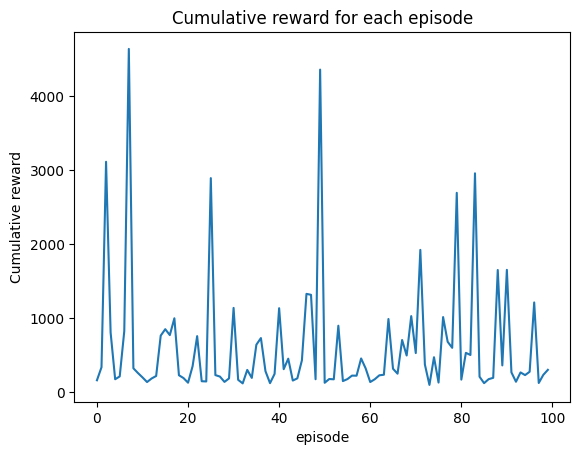

In [10]:
import matplotlib.pyplot as plt
plt.plot(np.array(rewards))
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

In [13]:
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
from IPython.display import HTML
from IPython import display as ipythondisplay
import glob
import io
import base64
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data=''''''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")


env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()
while True:
    env.render()
    action = np.argmax(q_table[get_discrete_state(env.reset()[0])])
    observation, reward, done, info, _ = env.step(action) 
    if done: 
      break;    
env.close()
show_video()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /Users/aryansharma/PoleDancer/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/wrappers/monitoring/video_recorder.py:59: UserWarning: WARN: Disabling video recorder because environment <TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>> was not initialized with any compatible video mode between `rgb_array` and `rgb_array_list`
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logge

KeyboardInterrupt: 